In [2]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [3]:
######### AirPassengers

In [4]:
FMAC = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets\FMAC-HPI_24420.csv")
FMAC.head()

,Date,NSA Value,SA Value
0,31-01-1975,24.739893,24.687815
1,28-02-1975,25.266825,25.200482
2,31-03-1975,25.765667,25.633002
3,30-04-1975,26.212724,26.009987
4,31-05-1975,26.628081,26.350592


In [15]:
########## NSA Value

In [6]:
y = FMAC['NSA Value']
y_train = y[:-12]
y_test = y[-12:]

In [7]:
######### Arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-258.744, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1625.721, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=545.901, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1668.139, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-211.845, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-254.857, Time=0.45 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 8.702 secon

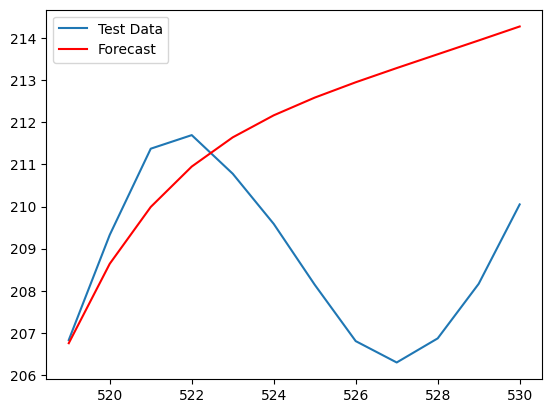

In [8]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

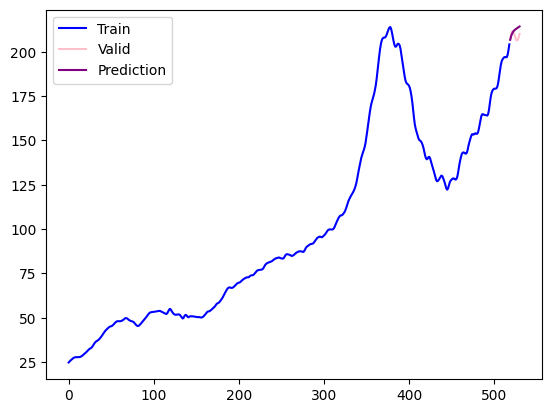

In [9]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [10]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 4.213


In [11]:
############# SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-334.292, Time=2.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1625.721, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=301.267, Time=0.64 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1668.139, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-305.538, Time=2.20 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-322.450, Time=5.27 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-333.916, Time=5.27 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-258.744, Time=0.73 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=4.73 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=4.46 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-329.080, Time=5.96 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-336.209, Time=2.29 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : A

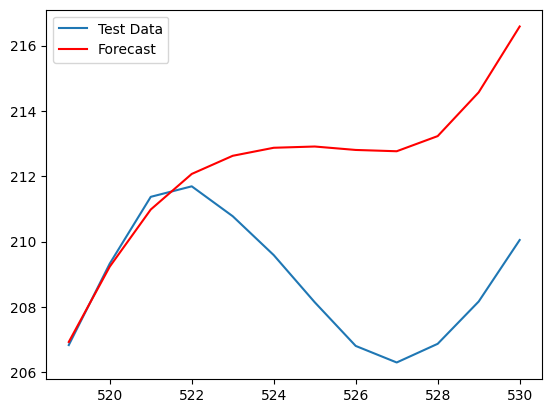

In [12]:
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

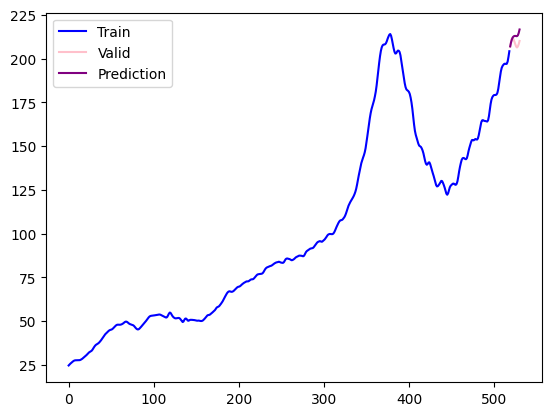

In [13]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [14]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 4.465


In [ ]:
######### SA values

In [16]:
y = FMAC['SA Value']
y_train = y[:-12]
y_test = y[-12:]

In [17]:
######### Arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-49.246, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1450.737, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25.346, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=897.481, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1510.192, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-38.939, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-25.052, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-61.884, Time=0.65 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-25.247, Time=0.69 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-70.735, Time=1.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-71.735, Time=0.83 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-71.404, Time=0.55 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-69.988, Time=1.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-32.614, Time=0.44 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-71.

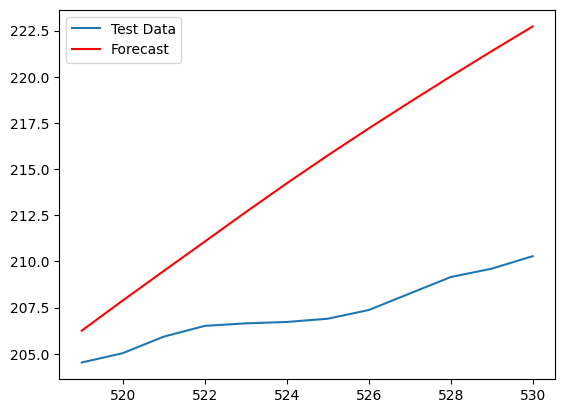

In [18]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

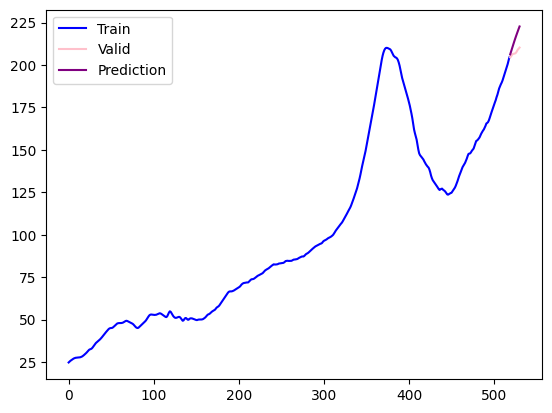

In [19]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [20]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 8.322


In [21]:
############# SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-99.762, Time=2.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1450.737, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=25.778, Time=0.73 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=660.930, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1510.192, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-75.690, Time=2.07 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-94.572, Time=2.15 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-99.913, Time=4.91 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-101.926, Time=4.09 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=-100.157, Time=2.74 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=-80.892, Time=2.39 sec
 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=-121.215, Time=5.27 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=-113.519, Time=1.81 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=-119.460, Time=5.65 sec
 ARIMA(3,1,2)(1,0,1)[12] in

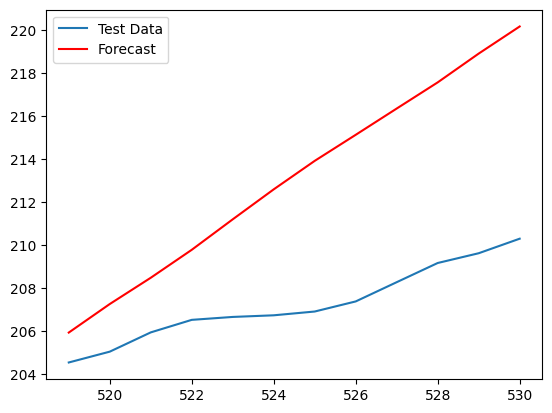

In [22]:
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

# plot results
plt.plot(y_test, label='Test Data')
plt.plot(forecast, color='red', label="Forecast")
plt.legend(loc='best')
plt.show()

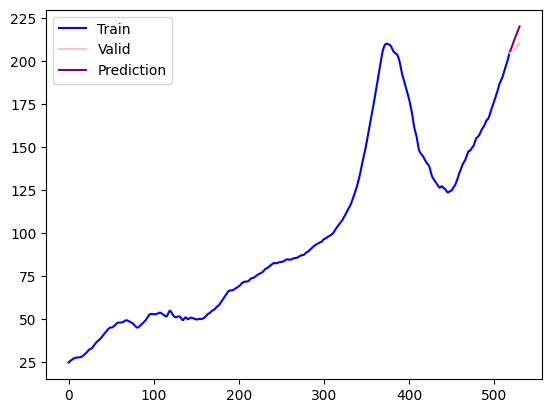

In [23]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [24]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 6.502
